# **Depend on the data, can the startup survive in the future?**


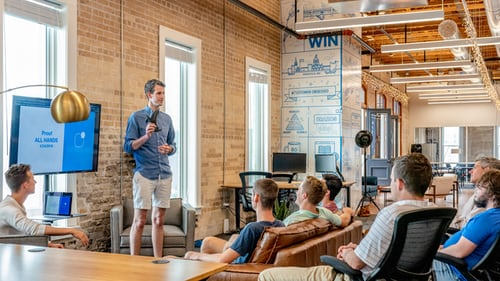



A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion. [Source of information: Wikipedia]

### **Objective**

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

## **Data Scientist Process**

## **1. Data Collection**

*\# Melakukan Konfigurasi Google Drive sebagai penyimpanan data*


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Data Scientist"

*\# Ubah working directory ke folder yang sesuai*

In [ ]:
%cd /content/gdrive/My Drive/Data Scientist

/content/gdrive/My Drive/Data Scientist


*\# Import data dari API Kaggle*

In [ ]:
!kaggle datasets download -d manishkc06/startup-success-prediction

  0% 0.00/64.1k [00:00<?, ?B/s]
100% 64.1k/64.1k [00:00<00:00, 8.85MB/s]


*\# unzip file zip dan hapus file zip*

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  startup-success-prediction.zip
replace startup data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: startup data.csv        


## **2. Data Exploration**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("startup data.csv")
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


Description of Data Columns (DType, Non-Null, DtypeCount)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

### **Explore Numeric and Categorical feature**

In [ ]:
#Numeric uf
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include = numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


In [ ]:
#Categorical
df_cat = df.select_dtypes(include = 'object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


### **Encode Class to Numeric : Acquired -> 1 ; Closed -> 0**

In [ ]:
df['status'] = df.status.map({'acquired':1, 'closed':0})
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

In [ ]:
#Cek kesamaan antara kolom labels dan status
rows_count = 0
for index, row in df.iterrows():
    if row['labels'] != row['status']:
        print(index, row['labels'], row['status'])
        rows_count += 1
if rows_count == 0 :
  print("Labels and status are the same")

Labels and status are the same


In [ ]:
#Cek kesamaan antara kolom state_code dan state_code.1
rows_count = 0
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])
        rows_count += 1
if rows_count == 0 :
  print("State_code and State_code.1 are the same")

515 CA nan


Terdapat satu nan pada fitur state_code.1 yang dimana sisanya adalah sama dengan fitur state_code maka kita bisa mengetahui bahwa kedua kolom adalah sama, maka kita bisa menghapus kolom tersebut

In [ ]:
#Hapus kolom labels
df.drop(['labels', 'state_code.1'], axis = 1, inplace = True)

## **3. Exploratory Data Analysis**

### **Pendekatan Numerik**
Perhitungan statistika terkait mean, median, etc

In [ ]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


In [ ]:
describeCat = df.describe(include=["object"])
describeCat.T

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


### **Missing Value**


In [ ]:
#Buat dataframe untuk mengidentifikasi missing value
nan_df = pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
nan_df['Percentage Missing'] = (df.isna().sum() / len(df) * 100)
nan = nan_df[nan_df["Percentage Missing"] > 0]
nan.style.background_gradient(cmap = 'viridis',low =0.2,high=0.1)

,Null Values,Percentage Missing
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039


Analisa hasil dari tabel missing value diatas :


*   Unamed: 6 dan Closed_at keduanya memiliki missing value diatas 50%
*   fitur closed_at adalah fitur yang jika memiliki nilai null maka startup tersebut masih dalam status Acquired



Untuk melakukan handling terhadap missing data diatas kita perlu melihat dahulu datanya seperti apa sehingga mendapat penanganan yang tepat :

In [ ]:
df_mv = df[['Unnamed: 6', 'closed_at', 'age_first_milestone_year', 'age_last_milestone_year']]
df_mv.head()

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year
0,NaN,NaN,4.6685,6.7041
1,NaN,NaN,7.0055,7.0055
2,San Diego CA 92121,NaN,1.4575,2.2055
3,Cupertino CA 95014,NaN,6.0027,6.0027
4,San Francisco CA 94105,10/1/2012,0.0384,0.0384



*   Dari data missing value diatas Unamed: 6 ternyata adalah gabungan dari kolom city, State_code dan Zip_code 
*   Closed_at adalah data berupa tanggal


**Handling Missing Value : Unnamed: 6**

kita bisa menghapus kolomnya terlebih dahulu setelah itu kita isi dengan kombinasi dari ketiga kolom (City, State_code dan Zip_code)

In [ ]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [ ]:
#Menghitung missing valuenya
print("Total missing value pada Unnamed:6 adalah", df['Unnamed: 6'].isna().sum())

Total missing value pada Unnamed:6 adalah 0


**Handling Missing Value : Closed_at**

Karena closed_at mengindikasikan tanggal dari penutupan suatu startup yang artinya jika terdapat datanya berarti startup tersebut sudah close, maka variabel ini tidak cocok dijadikan kedalam bentuk pemodelan. Kita bisa lakukan drop

In [ ]:
df.drop(labels='closed_at', axis=1, inplace=True)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


**Handling Missing Value : age_first_milestone_year & age_last_milestone_year**

Sebelum kita handling kita bisa eksplorasi datanya dulu yang berkaitan dengan kedua variabel diatas

In [ ]:
df[df['milestones'] == 0][['age_first_milestone_year', 'age_last_milestone_year', 'milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
12,NaN,NaN,0
15,NaN,NaN,0
24,NaN,NaN,0
32,NaN,NaN,0
34,NaN,NaN,0


Setelah dilihat datanya, maka nilai Nan disebabkan karena memang startup tersebut belum terdapat milestones maka nilainya tidak ada, jadi missing bisa kita handling dengan mengisinya dengan 0

In [ ]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0").astype(float)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0").astype(float)
df[df['milestones'] == 0][['age_first_milestone_year', 'age_last_milestone_year', 'milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
12,0.0,0.0,0
15,0.0,0.0,0
24,0.0,0.0,0
32,0.0,0.0,0
34,0.0,0.0,0


### **Pendekatan Grafik**
Perhitungan korelasi antara satu variabel dengan variabel yang lain

In [ ]:
df.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.130166,-0.123438,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.041030,-0.017674,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.054850,-0.083744,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,0.382395,0.236958,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.529763,0.436369,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
age_first_milestone_year,-0.130166,-0.041030,-0.054850,0.382395,0.529763,1.000000,0.813272,0.310615,0.203653,0.063757,0.198468,0.042312,-0.063721,0.061964,-0.007891,-0.041542,0.105210,-0.037349,-0.002441,0.027732,0.003546,-0.065086,-0.066627,-0.008895,0.037784,-0.016923,0.071394,-0.198481,0.073806,0.195873,0.168593,0.224239,0.052237,0.168606,0.250163
age_last_milestone_year,-0.123438,-0.017674,-0.083744,0.236958,0.436369,0.813272,1.000000,0.411711,0.257549,0.086555,0.543103,0.065809,-0.048850,0.052560,-0.011815,-0.074783,0.034156,0.040042,0.053354,0.045515,0.015474,-0.022773,-0.077904,-0.073885,0.019947,-0.059105,0.042486,-0.142864,0.170414,0.251696,0.208067,0.211145,0.072443,0.212903,0.358600
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,0.310615,0.411711,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.203653,0.257549,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.063757,0.086555,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176


*Untuk mempermudah analisa kita bisa melakukan visualisasi menggunakan HeatMap untuk melihat korelasi antar variabel*

(32.5, -0.5)

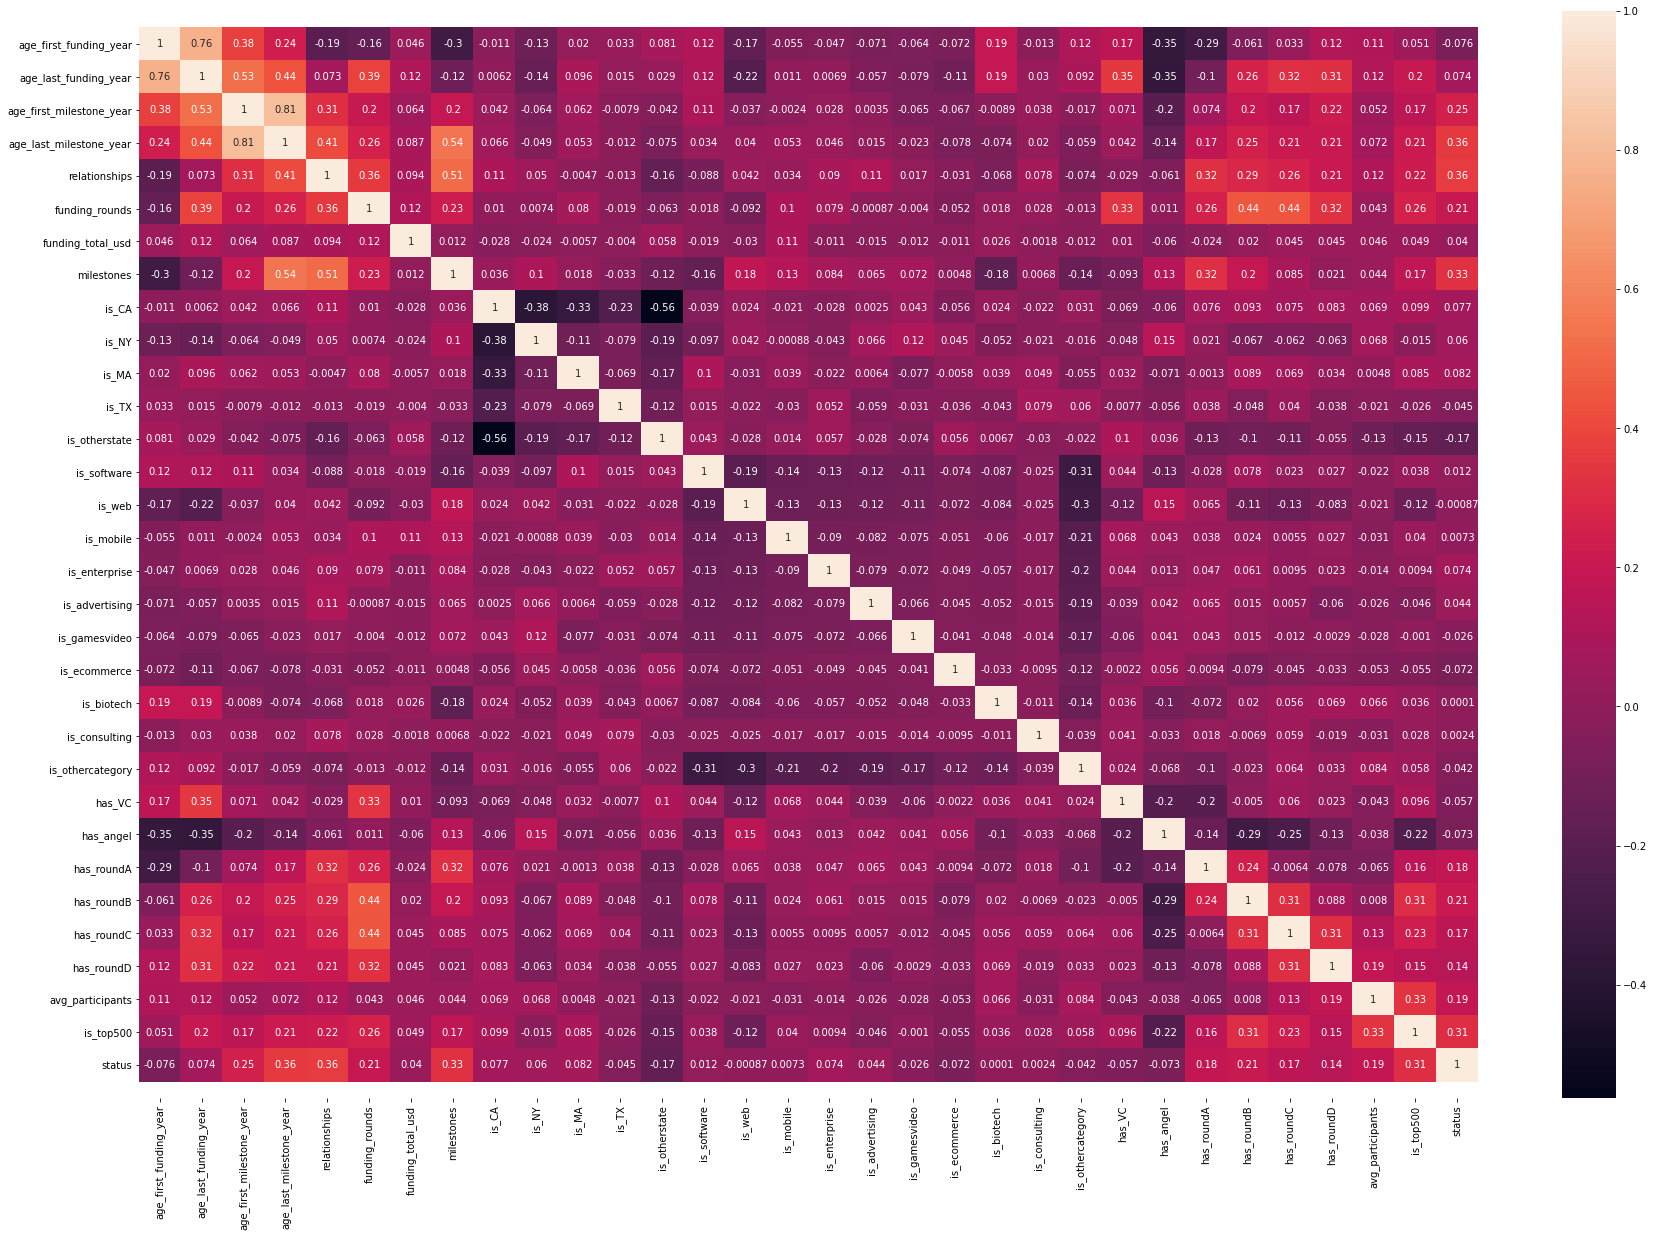

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

Menemukan outlier menggunakan visualisasi Boxplot

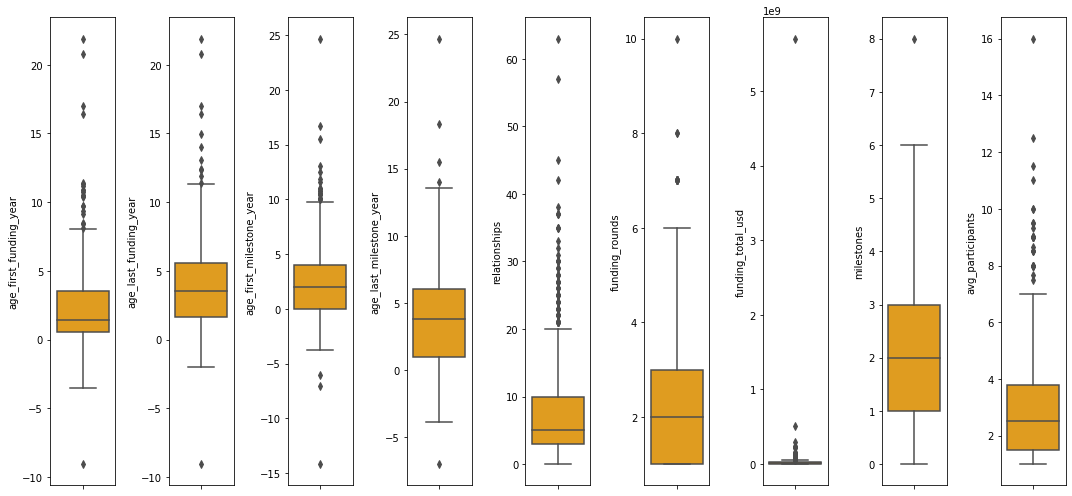

In [ ]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='orange', orient='v')
    plt.tight_layout()

## **Melakukan Pengambilan Insight yang dapat digunakan untuk perkembangan startup di Indonesia**

### Melakukan analisa kategori startup yang memiliki jumlah keberhasilan terbesar

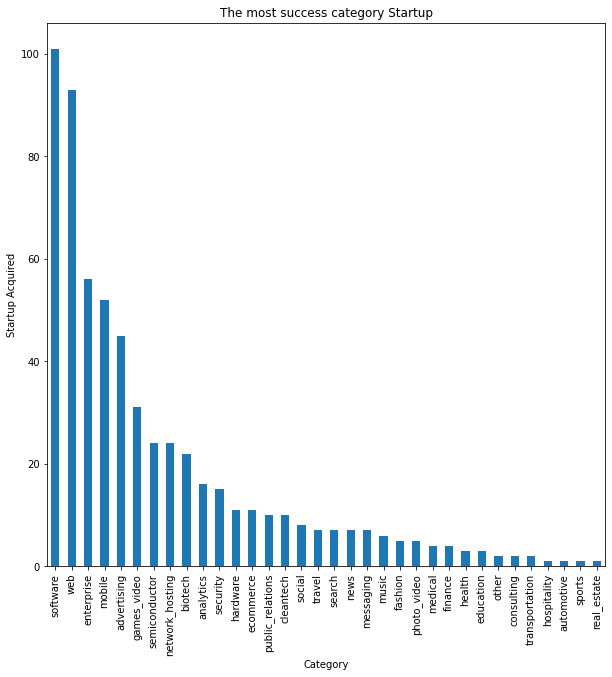

In [ ]:
import matplotlib.pyplot as plt
df_success_by_cat = df[df['status'] == 1]['category_code'].value_counts()
df_success_by_cat.plot(kind = 'bar', figsize = (10,10), title = "The most success category Startup", xlabel = "Category", ylabel = "Startup Acquired", )

### Melakukan analisa menentukan success rate dari suatu kategori (Seberapa besar keberhasilan suatu kategori yang dibandingkan dengan keseluruhan status)

In [ ]:
total_success = df[df['status'] == 1].groupby(['category_code']).agg({'status':'count'}).reset_index()
total_success.columns = ['category_code', 'total_success']

total_closed = df[df['status'] == 0].groupby(['category_code']).agg({'status':'count'}).reset_index()
total_closed.columns = ['category_code', 'total_closed']

total_startup = df.groupby(['category_code']).agg({'status':'count'}).reset_index()
total_startup.columns = ['category_code', 'total_startup']

df_result = total_success.merge(total_closed, on='category_code')
df_result = df_result.merge(total_startup, on='category_code')

df_result['success_rate'] = round(df_result['total_success'] / df_result['total_startup'] * 100, 2)
df_result_desc = df_result.sort_values('success_rate', ascending=False).reset_index(drop = True)
df_result_desc

,category_code,total_success,total_closed,total_startup,success_rate
0,travel,7,1,8,87.50
1,news,7,1,8,87.50
2,analytics,16,3,19,84.21
3,security,15,4,19,78.95
4,enterprise,56,17,73,76.71
5,education,3,1,4,75.00
6,advertising,45,17,62,72.58
7,photo_video,5,2,7,71.43
8,network_hosting,24,10,34,70.59
9,semiconductor,24,11,35,68.57


### *Kita bisa buat visualisasi data dari startup dengan success rate tertinggi ke terendah menggunakan histogram chart*

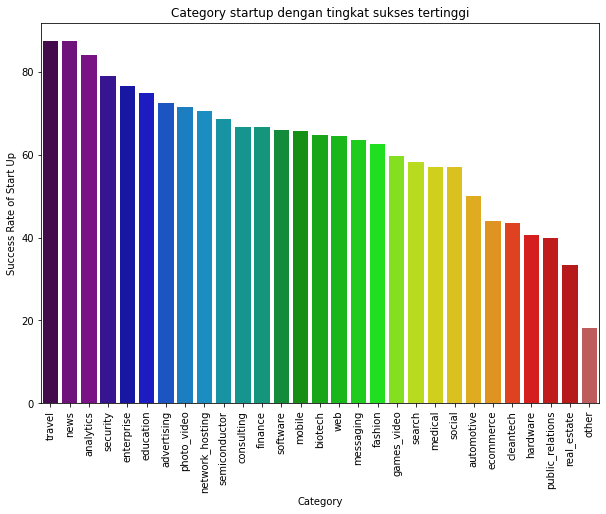

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=df_result_desc,
                palette="nipy_spectral", ax=ax).set_title("Category startup dengan tingkat sukses tertinggi")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

### Melakukan analisa kategori startup yang memiliki funding terbesar

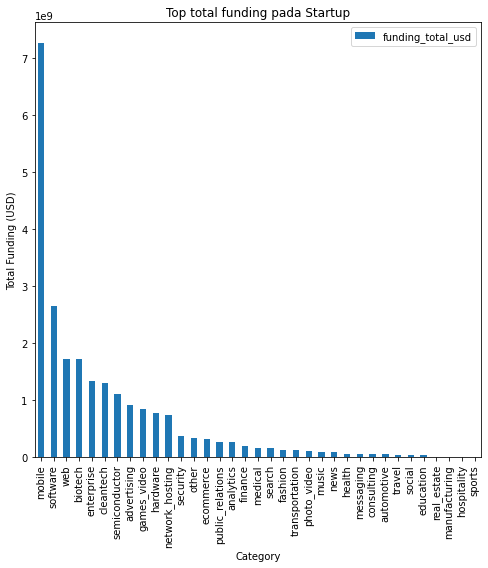

In [ ]:
df_funding = df.groupby('category_code').agg({'funding_total_usd':'sum'}).sort_values('funding_total_usd', ascending=False)
df_funding.plot(kind='bar', xlabel='Category', ylabel='Total Funding (USD)', title='Top total funding pada Startup', figsize=(8,8))

### **Melihat distribusi data khususnya pada dependen variabel apakah terdapat imbalance data atau tidak**

In [ ]:
df_status = df['status'].value_counts()
print("Presentase jumlah acquired : ", round(df[df['status'] == 1].shape[0] / len(df) * 100, 2), "%")
print("Presentase jumlah acquired : ", round(df[df['status'] == 0].shape[0] / len(df) * 100, 2), "%")

Presentase jumlah acquired :  64.68 %
Presentase jumlah acquired :  35.32 %


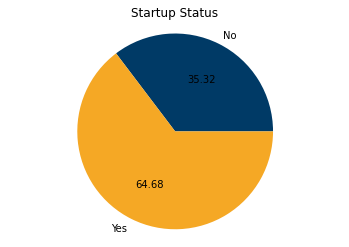

In [ ]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003A66', '#F5A825'], textprops={'color': '#000000'}, autopct='%.2f')
_ = ax.axis('equal')
_ = ax.set_title('Startup Status')

## **4. Data Preprocessing**

### **Handling duplicate data**

In [ ]:
duplicate_data = df[df.duplicated()]
duplicate_data.value_counts()

Series([], dtype: int64)

Dari penelurusan diatas terlihat tidak ada data duplikat dikarenakan salah satu variabelnya ada yang berbeda, tapi karena kita sudah melakukan eksplorasi data sebelumnya, khususnya dibagian analisis kategorikal data kita melihat adanya record data yang memiliki kesamaan nama, id, object_id. Maka dari itu kita bisa melakukan drop duplicate pada data tersebut 

In [ ]:
duplicate_data = df[df['name'].duplicated()]
duplicate_data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,1/1/2008,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,c:28482,1,0,1,1,1,0,2.25,1,1


In [ ]:
df.drop_duplicates(subset=['name'], keep='first', inplace=True)
df.reset_index(drop=True)
duplicate_check = df[df['name'].duplicated()]
duplicate_check

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


### **Handling Negative Value**

In [ ]:
#Melakukan pengecekan apakah ada nilai negatif pada variabel yang seharusnya tidak ada negative
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]
for column in age:
  print('Jumlah negative value pada kolom', column, ':', len(df[df[column] < 0][column]))

Jumlah negative value pada kolom age_first_funding_year : 46
Jumlah negative value pada kolom age_last_funding_year : 13
Jumlah negative value pada kolom age_first_milestone_year : 46
Jumlah negative value pada kolom age_last_milestone_year : 12


In [ ]:
#Melakukan dropping data pada negative value
for column in age:
  df = df.drop(df[df[column] < 0].index)

In [ ]:
#Melakukan pengecekan kembali apakah masih ada data yang memiliki negative value pada age
for column in age:
  print('Jumlah negative value pada kolom', column, ':', len(df[df[column] < 0][column]))

Jumlah negative value pada kolom age_first_funding_year : 0
Jumlah negative value pada kolom age_last_funding_year : 0
Jumlah negative value pada kolom age_first_milestone_year : 0
Jumlah negative value pada kolom age_last_milestone_year : 0


### **Handling Outlier**

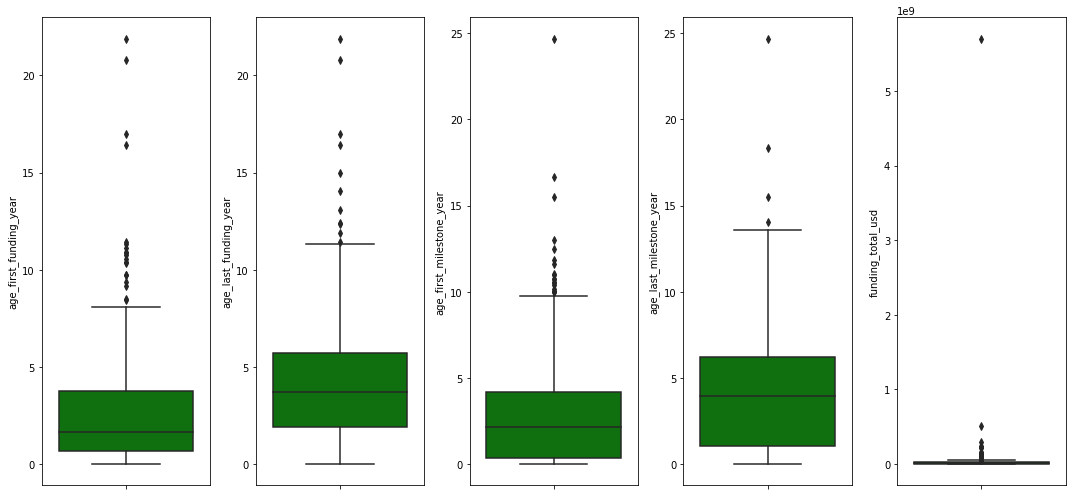

In [ ]:
features_numeric = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']
plt.figure(figsize=(15, 7))
for i in range(0, len(features_numeric)):
    plt.subplot(1, len(features_numeric), i+1)
    sns.boxplot(y=df[features_numeric[i]], color='green', orient='v')
    plt.tight_layout()

### *Log-transformation of the funding and milestone year variable*

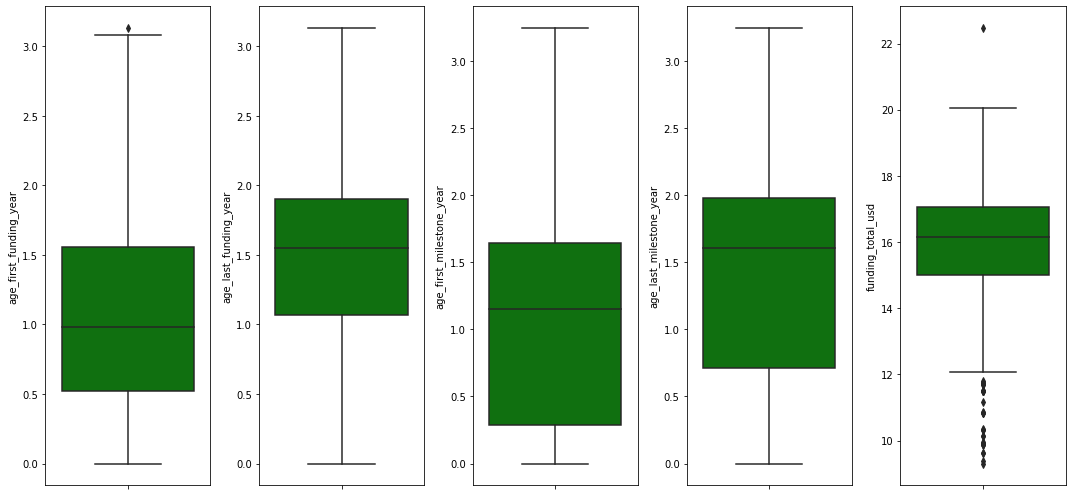

In [ ]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

plt.figure(figsize=(15, 7))
for i in range(0, len(features_numeric)):
    plt.subplot(1, len(features_numeric), i+1)
    sns.boxplot(y=df[features_numeric[i]], color='green', orient='v')
    plt.tight_layout()

## **5. Feature Engineering**

### Menambahkan fitur - fitur lain yang bisa mendukung pemodelan 

Karena kita memiliki fitur mengenai funding yaitu Round A, Round B, Round C, Round D. Kita bisa membuat fitur baru untuk melihat apakah startup tersebut memiliki funding baik A, B, C ataupun D.

In [ ]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0


Karena kita memiliki kolom has_angel dan has_VC :


*   has_angel, variabel yang maknanya adalah startup memiliki angel investor yaitu investor awal untuk startup - startup kecil atau baru dibuat
*   has_VC, ketika sudah memasuki round A, B, C ataupun D maka investor dinamakan menjadi Venture Capital

Kita bisa membuat feature baru yaitu apakah startup sudah memiliki investor atau tidak



In [ ]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1


Setelah menambahkan kedua fitur diatas kita bisa menambah fitur baru lagi terkait kedua fitur tersebut. Pada startup ada istilah yang disebut Seed yaitu pendanaan yang digunakan untuk penumbuhan startup jika suatu startup tidak memiliki seed maka sangat mempengaruhi kesuksesan startup kedepannya. Maka kita bisa membuat fitur has_Seed

In [ ]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1


**Melakukan drop kolom yang tidak digunakan saat pemodelan**

In [ ]:
feature_drop = ['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 
                'founded_at', 'first_funding_at', 'last_funding_at', 'category_code', 'object_id']

df = df.drop(feature_drop, axis=1)
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,0,1,1
1,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1,1,0
2,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,1,0,0
3,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1,0,0
4,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,1,1


Memindahkan kolom class atau dependent variabel ke index terakhir kolom

In [ ]:
df_status = df[['status']]
df = df.loc[:, df.columns != 'status']
df['status'] = df_status
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,has_RoundABCD,has_Investor,has_Seed,status
0,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,1,1,1
1,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1,0,1
2,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,0,0,1
3,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,0,0,1
4,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,1,1,0


## **6. Modelling**

### Melakukan pembagian dataset training dan dataset testing

**Agar kita mendapatkan model yang baik, kita perlu melakukan transformasi pada seluruh fitur dalam skala yang sama sehingga setiap fitur memberikan kontribusi yang sama besarnya**

In [ ]:
X = df.drop('status', axis=1)
y = df['status']

from sklearn.preprocessing import MinMaxScaler

X_unscale = X
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Check shape dari hasil pembagian data
print("Shape dari X Train :", X_train.shape)
print("Shape dari y Train :", y_train.shape)
print("Shape dari X test :", X_test.shape)
print("Shape dari y test :", y_test.shape)

Shape dari X Train : (671, 34)
Shape dari y Train : (671,)
Shape dari X test : (168, 34)
Shape dari y test : (168,)


### **Melakukan Perbandingan hyperparameters atau hyperplane terbaik dalam melakukan klasfikasi**

**Modelling Menggunakan SVC dengan default Hypermeters (Default : C=1.0, kernel=rbf and gamma=auto)**

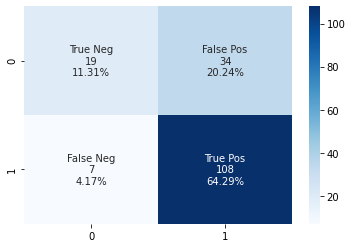

In [ ]:
from sklearn.svm import SVC

svc = SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#Conffusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting Conf Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Melakukan perhitungan Akurasi, presisi, Error
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print('Akurasi : ',round((((TP+TN)/(TP+TN+FP+FN))*100), 2), "%")
print('Presisi : ',round(((TP/(TP+FP))*100), 2), "%")
print('Error : ', round((FP+FN)/(TP+TN+FP+FN)*100, 2), "%")

Akurasi :  75.6 %
Presisi :  76.06 %
Error :  24.4 %


**Modelling Menggunakan SVC dengan parameters : C=100.0, kernel=rbf**


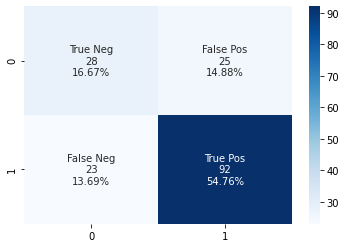

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=100) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#Conffusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting Conf Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Melakukan perhitungan Akurasi, presisi, Error
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print('Akurasi : ',round((((TP+TN)/(TP+TN+FP+FN))*100), 2), "%")
print('Presisi : ',round(((TP/(TP+FP))*100), 2), "%")
print('Error : ', round((FP+FN)/(TP+TN+FP+FN)*100, 2), "%")

Akurasi :  71.43 %
Presisi :  78.63 %
Error :  28.57 %


**Modelling Menggunakan SVC dengan parameters : C = 1.0, kernel = linear**


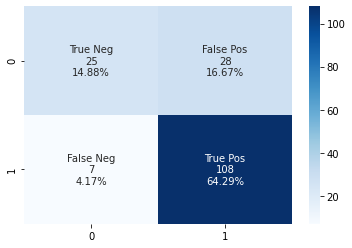

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='linear') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#Conffusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting Conf Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Melakukan perhitungan Akurasi, presisi, Error
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print('Akurasi : ',round((((TP+TN)/(TP+TN+FP+FN))*100), 2), "%")
print('Presisi : ',round(((TP/(TP+FP))*100), 2), "%")
print('Error : ', round((FP+FN)/(TP+TN+FP+FN)*100, 2), "%")

Akurasi :  79.17 %
Presisi :  79.41 %
Error :  20.83 %


**Modelling Menggunakan SVC dengan parameters : C = 100.0, kernel = linear**

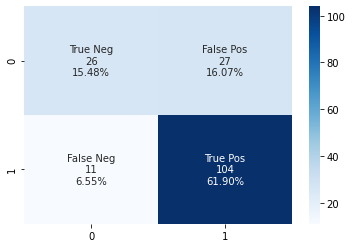

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=100.0, kernel='linear') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#Conffusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting Conf Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Melakukan perhitungan Akurasi, presisi, Error
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print('Akurasi : ',round((((TP+TN)/(TP+TN+FP+FN))*100), 2), "%")
print('Presisi : ',round(((TP/(TP+FP))*100), 2), "%")
print('Error : ', round((FP+FN)/(TP+TN+FP+FN)*100, 2), "%")

Akurasi :  77.38 %
Presisi :  79.39 %
Error :  22.62 %


**Modelling Menggunakan SVC dengan parameters : C = 1.0, kernel = polynomial**

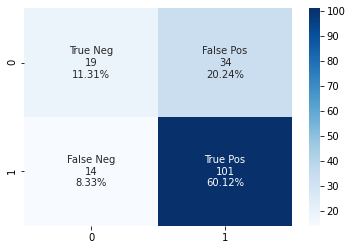

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='poly') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#Conffusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting Conf Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Melakukan perhitungan Akurasi, presisi, Error
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print('Akurasi : ',round((((TP+TN)/(TP+TN+FP+FN))*100), 2), "%")
print('Presisi : ',round(((TP/(TP+FP))*100), 2), "%")
print('Error : ', round((FP+FN)/(TP+TN+FP+FN)*100, 2), "%")

Akurasi :  71.43 %
Presisi :  74.81 %
Error :  28.57 %


**Modelling Menggunakan SVC dengan parameters : C = 100.0, kernel = polynomial**

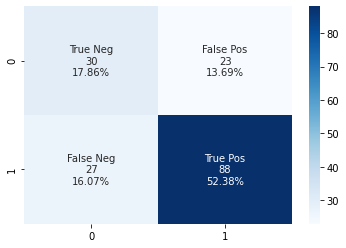

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=100.0, kernel='poly') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#Conffusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting Conf Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Melakukan perhitungan Akurasi, presisi, Error
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print('Akurasi : ',round((((TP+TN)/(TP+TN+FP+FN))*100), 2), "%")
print('Presisi : ',round(((TP/(TP+FP))*100), 2), "%")
print('Error : ', round((FP+FN)/(TP+TN+FP+FN)*100, 2), "%")

Akurasi :  70.24 %
Presisi :  79.28 %
Error :  29.76 %


# **Visualisasi hyperparameter terbaik dalam membuat pemodelan berdasarkan akurasi**

In [ ]:
dict_accuracy = {
    'parameter' : ['Kernel: rbf & C: 1.0', 'Kernel: rbf & c: 100.0', 'Kernel: Linear & C: 1.0', 'Kernel: Linear & C: 100.0', 'Kernel: Poly & C: 1.0', 'Kernel: Poly & C: 100.0'],
    'Accuracy(%)' : [75.6, 71.43, 79.17, 77.38, 71.43, 70.24]
}
df_accuracy = pd.DataFrame(dict_accuracy)


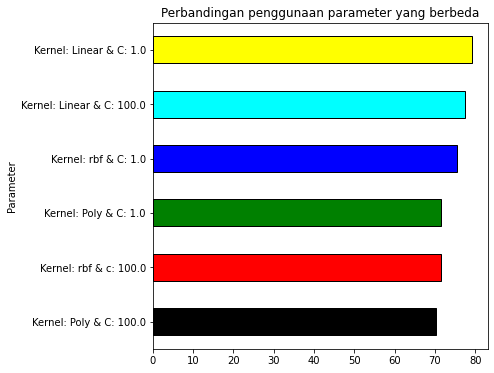

In [ ]:
df_acc_plot = df_accuracy.sort_values('Accuracy(%)', ascending=True)
df_acc_plot.plot(x='parameter', y='Accuracy(%)', kind='barh', xlabel='Parameter', ylabel='Accuracy (%)', 
                 title='Perbandingan penggunaan parameter yang berbeda', figsize=(6,6), legend=None, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'], edgecolor='black')